In [125]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import  train_test_split, StratifiedKFold
from sklearn.metrics import roc_auc_score, plot_roc_curve, plot_confusion_matrix, roc_curve, f1_score, classification_report
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import NuSVC, SVC

In [2]:
!pip install gdown
!gdown https://drive.google.com/uc?id=1CTAlmlREFRaEN3NoHHitewpqAtWS5cVQ

Downloading...
From: https://drive.google.com/uc?id=1CTAlmlREFRaEN3NoHHitewpqAtWS5cVQ
To: /content/Credit-Card-Dataset.zip
69.2MB [00:00, 112MB/s] 


In [3]:
!pwd
!unzip /content/Credit-Card-Dataset.zip
!unzip /content/Credit-card-dataset/creditcard.csv.zip

/content
Archive:  /content/Credit-Card-Dataset.zip
   creating: Credit-card-dataset/
  inflating: Credit-card-dataset/creditcard.csv.zip  


In [5]:
# get data
data = pd.read_csv('creditcard.csv')

In [6]:
# A quick look of the data reveals that the features are anonymised, probably using PCA or similar process.
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


###### The dataset is highly imbalanced with only 0.17% of fraud transactions.

In [9]:
# Case counts
counts = data.Class.value_counts().tolist()
#fraud_count, non_fraud-count = values
print ("Fraud cases {}, fraud case percentage {}".format(counts[1], round(counts[1]/data.shape[0], 4)))
print ("Non-Fraud cases {}, non-fraud case percentage {}".format(counts[0], round(counts[0]/data.shape[0], 4)))

Fraud cases 492, fraud case percentage 0.0017
Non-Fraud cases 284315, non-fraud case percentage 0.9983


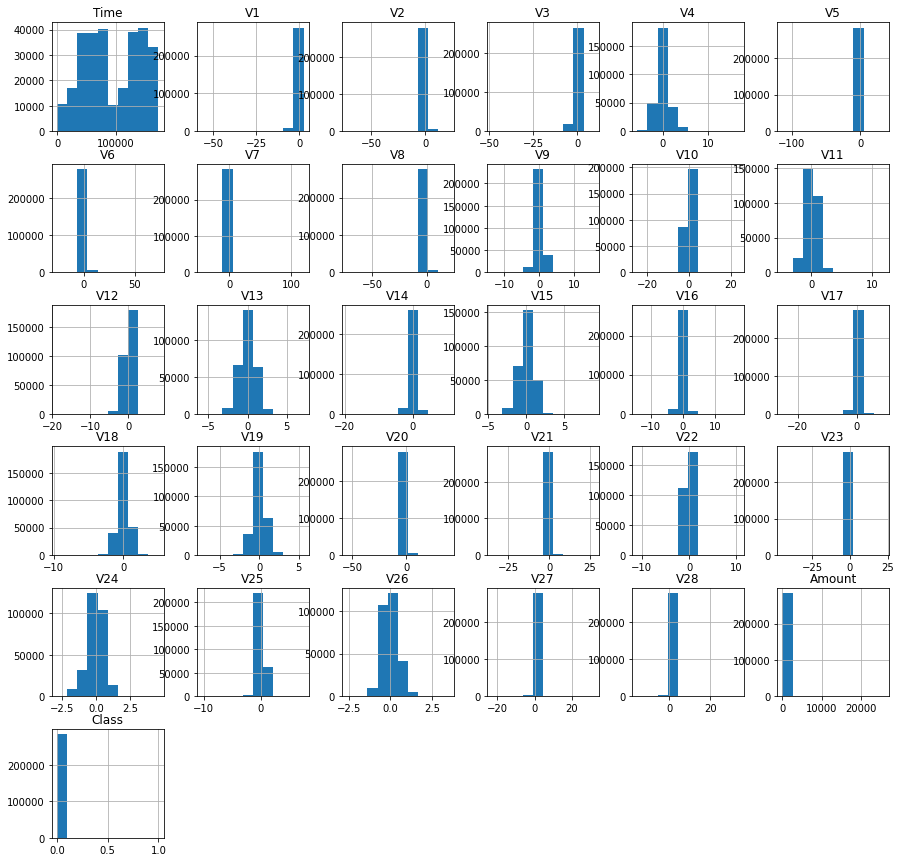

In [7]:
# Histogram of all features
p = data.hist(figsize = (15,15))

###### Correlation between feature doesn't seem to be high. Features 'time' and 'V3' and  'Amount' and 'V2' have some -ve correlation.

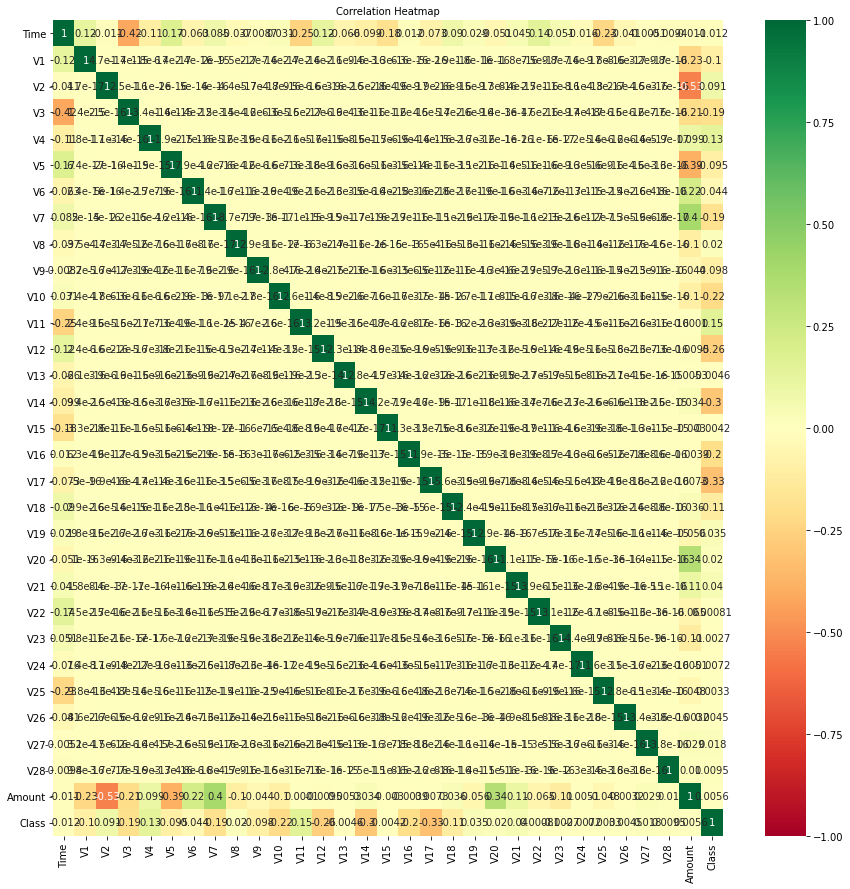

In [8]:
#plot the correlation map of the dataset  
plt.figure(figsize=(15,15))
corr = data.corr()
corr.index = data.columns
sns.heatmap(corr, annot = True, cmap='RdYlGn', vmin=-1, vmax=1)
plt.title("Correlation Heatmap", fontsize=10)
plt.show()

###### Amount distribution suggest that there is a significant difference in the mean of fraud and non-fraud cases. Amount can be an important feature to classify transactions.

###### Interestingly, the max amount of fraudulent transactions is 2125 only!

In [11]:
# Amount distribution for both classes
data.groupby('Class')['Amount'].describe()

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,284315.0,88.291022,250.105092,0.0,5.65,22.00,77.05,25691.16
1,492.0,122.211321,256.683288,0.0,1.00,9.25,105.89,2125.87


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/dis

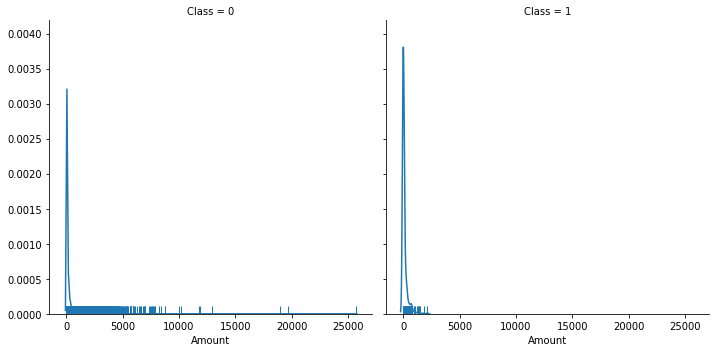

In [103]:
#fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)

g = sns.FacetGrid(data, col='Class', height=5)
p1 = g.map(sns.distplot, 'Amount', hist=False, rug=True).add_legend()

#sns.displot(data=data, x="Amount", col="Class", kind="kde")


In [15]:
#plt.figure()
#sns.pairplot(data=data.sample(10000),hue='Class',diag_kind='kde', palette='deep')

### Train test split

In [21]:
features = data.drop(['Class'], axis=1)
labels = data.Class

x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2, stratify=labels,  random_state = 1)

### Pipeline

In [114]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import xgboost
from sklearn.neighbors import  KNeighborsClassifier

pre_process = ColumnTransformer(remainder = 'passthrough',
                                transformers = [('scale_data',StandardScaler(),['Amount','Time'])])
                                                

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.70      0.78        98

    accuracy                           1.00     56962
   macro avg       0.94      0.85      0.89     56962
weighted avg       1.00      1.00      1.00     56962

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.91      0.87      0.89        98

    accuracy                           1.00     56962
   macro avg       0.96      0.93      0.94     56962
weighted avg       1.00      1.00      1.00     56962

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.93      0.83      0.88        98

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962



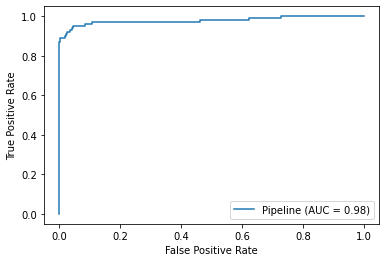

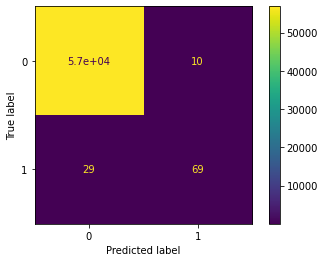

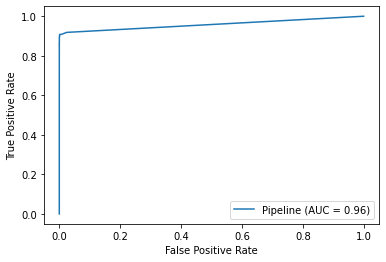

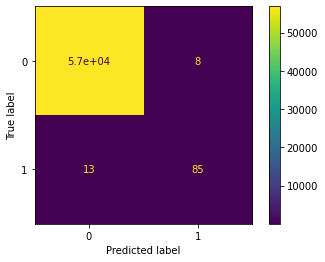

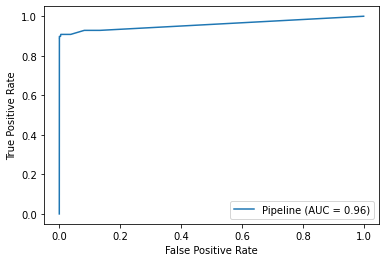

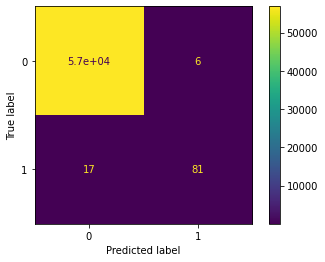

In [128]:
models = {'log_reg': LogisticRegression(),
          'rf':RandomForestClassifier(n_jobs=-1),
          #'svc': SVC(C = 50, degree = 1, gamma = "auto", kernel = "rbf", probability = True),
          'xgb':xgboost.XGBClassifier(n_estimators=50, n_jobs=-1)}

roc_scores = pd.DataFrame(columns = ['model_name','ROC_AUC Score', 'F1 Score'])
for i, key in enumerate(models):
  #print(models[key])
  model_pipeline = Pipeline(steps = [('pre_processing', pre_process),
                                      (key, models[key])])
  model_pipeline.fit(x_train, y_train)                               
  plot_roc_curve(model_pipeline, x_test, y_test)
  plot_confusion_matrix(model_pipeline, x_test, y_test)
  roc_scores.loc[len(roc_scores)] = [key, roc_auc_score(y_test,model_pipeline.predict_proba(x_test)[:,1] ), f1_score(y_test,model_pipeline.predict(x_test))]
  print(classification_report( y_test, model_pipeline.predict(x_test)))


In [129]:
roc_scores

,model_name,ROC_AUC Score,F1 Score
0,log_reg,0.977501,0.779661
1,rf,0.957990,0.890052
2,xgb,0.958235,0.875676


### Stacking

In [130]:
from sklearn.ensemble import StackingClassifier

estimators = [
                ('rf',RandomForestClassifier(n_jobs=-1, random_state=43)),
                ('lr', LogisticRegression()),
                ('xgb', xgboost.XGBClassifier(n_jobs=-1))]

#estimators = [
#                ('rf',model_pipeline_rf),
#                ('lr', model_pipeline_lr)]

In [131]:
clf = StackingClassifier(estimators = estimators, final_estimator = LogisticRegression(), n_jobs=-1)
clf.fit(x_train, y_train)

StackingClassifier(cv=None,
                   estimators=[('rf',
                                RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                     

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.86      0.91        98

    accuracy                           1.00     56962
   macro avg       0.98      0.93      0.95     56962
weighted avg       1.00      1.00      1.00     56962



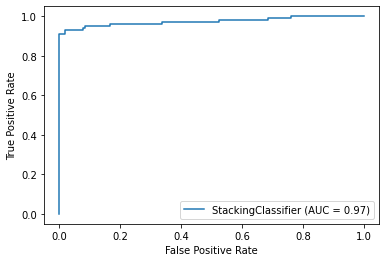

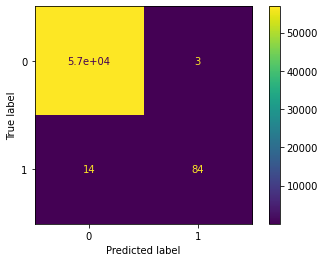

In [132]:
#Print classificatin report, ROC plot and confusion matrix
print(classification_report( y_test, clf.predict(x_test)))
plot_roc_curve(clf, x_test, y_test)
plot_confusion_matrix(clf, x_test, y_test)

# Add score to score dataframe
roc_scores.loc[len(roc_scores)] = ['stacked_model', roc_auc_score(y_test,clf.predict_proba(x_test)[:,1] ), f1_score(y_test,clf.predict(x_test))]

roc_scores

,model_name,ROC_AUC Score,F1 Score
0,log_reg,0.977501,0.779661
1,rf,0.957990,0.890052
2,xgb,0.958235,0.875676
3,stacked_model,0.972706,0.908108
